Intercept (θ_0) = 6.302531328615827, Slope (θ_1) = -9.706844233736408, Quadratic term (θ_2) = 4.507777835944751


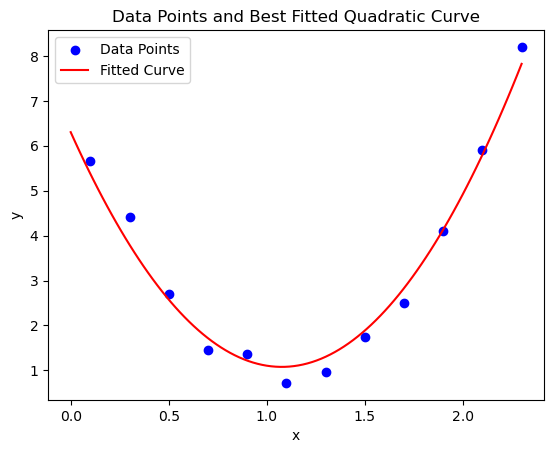

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose we want to obtain the fitted line to describe the relationship between x=[0.10, 0.30, 0.50, 0.70, 0.90, 1.10, 1.30, 1.50, 1.70, 1.90, 2.10, 2.30] and y=[5.65, 4.41, 2.69, 1.46, 1.36, 0.72, 0.96, 1.75, 2.50, 4.10, 5.90, 8.20]
# Function to perform gradient descent for non-linear (quadratic) regression using matrix operations with tolerance
def gradient_descent_matrix_method(X, y, learning_rate=0.01, iterations=10000, tolerance=1e-8):
    # Number of data points (m) and number of features (n)
    m, n = X.shape
    
    # Initialize parameters (theta) to zeros (one for each feature, including intercept)
    theta = np.zeros(n)
    
    for i in range(iterations):
        # Compute predictions: X.dot(theta) is a matrix-vector multiplication
        y_predicted = X.dot(theta)
        
        # Compute the gradient: (1/m) * X.T.dot(y_predicted - y)
        gradient = (1/m) * X.T.dot(y_predicted - y)
        
        # Update parameters (theta)
        new_theta = theta - learning_rate * gradient
        
        # Check for convergence
        if np.linalg.norm(new_theta - theta, ord=1) < tolerance:
            print(f"Convergence reached at iteration {i}")
            break
        
        # Update theta
        theta = new_theta
        
    # Return the final parameters (theta)
    return theta

# Example usage
# Features (X): Add a column of ones for the intercept, and quadratic term
X = np.array([
    [1.0, 0.10, 0.10**2],
    [1.0, 0.30, 0.30**2],
    [1.0, 0.50, 0.50**2],
    [1.0, 0.70, 0.70**2],
    [1.0, 0.90, 0.90**2],
    [1.0, 1.10, 1.10**2],
    [1.0, 1.30, 1.30**2],
    [1.0, 1.50, 1.50**2],
    [1.0, 1.70, 1.70**2],
    [1.0, 1.90, 1.90**2],
    [1.0, 2.10, 2.10**2],
    [1.0, 2.30, 2.30**2]
])

# Target values (y)
y = np.array([5.65, 4.41, 2.69, 1.46, 1.36, 0.72, 0.96, 1.75, 2.50, 4.10, 5.90, 8.20])

# Run gradient descent with the matrix method
theta = gradient_descent_matrix_method(X, y)

# Final intercept and slopes
intercept = theta[0]  # θ_0
slope = theta[1]      # θ_1
slope_2 = theta[2]    # θ_2

print(f"Intercept (θ_0) = {intercept}, Slope (θ_1) = {slope}, Quadratic term (θ_2) = {slope_2}")

# Plotting the data points (scatter plot)
plt.scatter(X[:, 1], y, color="blue", label="Data Points")

# Plotting the best-fitted quadratic curve
x_values = np.linspace(0, 2.3, 100)  # Generate 100 points for smooth curve
y_values = intercept + slope * x_values + slope_2 * (x_values**2)  # Quadratic equation

plt.plot(x_values, y_values, color="red", label="Fitted Curve")

# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points and Best Fitted Quadratic Curve')
plt.legend()

# Display the plot
plt.show()
